## Essential library imports

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from collections import defaultdict
import numpy as np

#### 1. Generate Data

In [ ]:
X, y = make_blobs(n_samples = 500, centers = 3, cluster_std = [1.0,1.5,2.0], random_state = 0)

## Plotting Data

In [ ]:
print(f'Shape of training data: {X.shape} \nShape of labels: {y.shape}')

Shape of training data: (500, 2) 
Shape of labels: (500,)


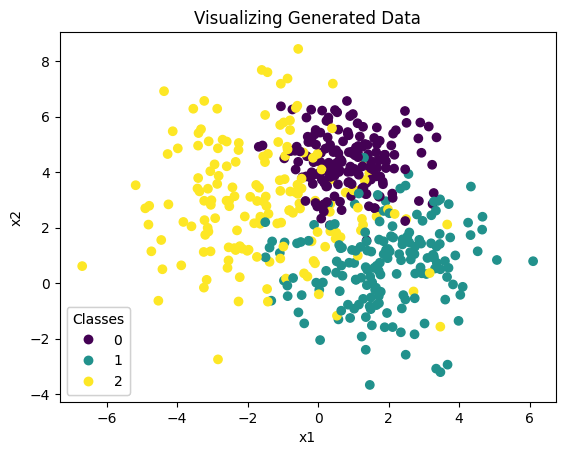

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Visualizing Generated Data')
plt.show()


## Split the Data into 80:20 Training and Testing set

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

### Printing Split and Class Distribution

In [ ]:
print(f'Training Data: {X_train.shape}')
print(f'Training Labels: {y_train.shape}')
print(f'Testing Data: {X_test.shape}')
print(f'Testing Labels: {y_test.shape}')

Training Data: (400, 2)
Training Labels: (400,)
Testing Data: (100, 2)
Testing Labels: (100,)


In [ ]:
print('Distribution of classes in training data')
cnt = [0,0,0]
for label in y_train:
  cnt[label]+=1
print('Class     Count    %')
for label,c in enumerate(cnt):
  print(f'Class {label}    {c}    {(c/len(y_train))*100}%')

Distribution of classes in training data
Class     Count    %
Class 0    133    33.25%
Class 1    134    33.5%
Class 2    133    33.25%


In [ ]:
print('Distribution of classes in testing data')
cnt = [0,0,0]
for label in y_test:
  cnt[label]+=1
print('Class     Count    %')
for label,c in enumerate(cnt):
  print(f'Class {label}    {c}    {(c/len(y_test))*100}%')

Distribution of classes in testing data
Class     Count    %
Class 0    34    34.0%
Class 1    33    33.0%
Class 2    33    33.0%


## Visualize Split

[]

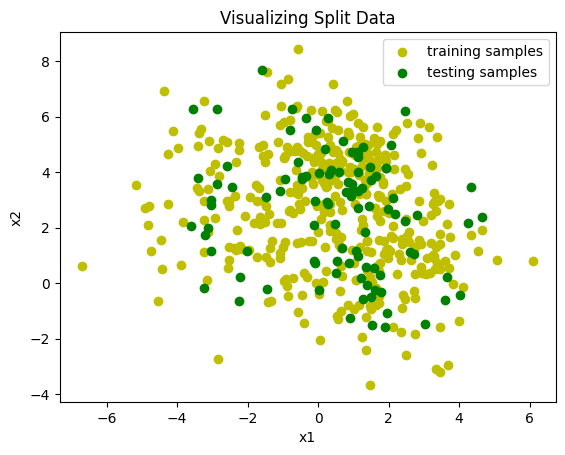

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c='y', label='training samples')
plt.scatter(X_test[:,0], X_test[:,1], c='g', label='testing samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Visualizing Split Data')
plt.legend()
plt.plot()

## Creating a gaussian naive bayes classifier for our data

#### We need following things to get the probablities:


1.   P(y) for each y
2.   P(x1|y) for each y
3. P(x2|y) for each y

We can use gaussian distribution to get 2 and 3. Then we can calculate using:

P(y|x1,x2) = p(x1|y) * p(x2|y) * p(y) for each y

and label would be max of those probablities



In [ ]:
class GaussianNaiveBayes:
  #init the classifier
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.classes = set(y)
    self.total_examples = len(self.X)
    self.num_classes = len(self.classes)
    self.num_features = len(self.X[0])
    self.class_probs = []
    self.data_summaries = {}
  # fit to the training data
  def fit(self):
    self.data = defaultdict(list)
    self.class_probs = {}

    for i in range(len(self.X)):
      self.data[self.y[i]].append(self.X[i])

    for label, examples in self.data.items():
      self.class_probs[label] = len(examples)/self.total_examples

    self.data_summaries = self.calculate_summaries(self.data)

  def calculate_summaries(self, data):
    data_summaries = {}
    for label, example in self.data.items():
      data_summaries[label] = [[0,0]]*self.num_features
      for i in range(self.num_features):
        x = []
        for e in example:
          x.append(e[i])
        mean = np.mean(x)
        std = np.std(x,ddof=1)
        data_summaries[label][i] = [mean,std]
    return data_summaries

  def get_prob(self,mean, std, x):
    exponent = np.exp(-((x-mean)**2 / (2 * std**2 )))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent
    # e = np.exp(-np.square(x-mean)/(2*np.square(std)))
    # return (1/(np.sqrt(2*np.pi)*std))*e

  # predict after fitting
  def predict(self,data):
    out = []
    preds = []
    for example in data:
      pred = [1]*self.num_classes
      for c in range(self.num_classes):
        pred[c] *= self.class_probs[c]
        for i in range(self.num_features):
          #print(self.get_prob(self.data_summaries[c][i][0], self.data_summaries[c][i][1], example[i]))
          pred[c] *= self.get_prob(self.data_summaries[c][i][0], self.data_summaries[c][i][1], example[i])
      out.append(np.argmax(pred))
      preds.append(pred)
    return out,preds
  #helper function for debugging
  def summary(self):
    if self.num_classes:
      print('Num of classes: ', self.num_classes)
    if self.classes:
      print('Classes: ', self.classes)
    if self.num_features:
      print('Num Features: ', self.num_features)
    if self.class_probs:
      print('P(y), i.e., class probs ', self.class_probs)
    if self.data_summaries:
      print('Individual Features Summary for GDF'),
      for c, features in self.data_summaries.items():
        print(f'Class {c}')
        for i,feature in enumerate(features):
          print(f'X{i+1}\t Mean: {feature[0]} \t Std: {feature[1]}')

In [ ]:
gnb = GaussianNaiveBayes(X_train, y_train)

In [ ]:
gnb.summary()

Num of classes:  3
Classes:  {0, 1, 2}
Num Features:  2


In [ ]:
gnb.fit()

In [ ]:
gnb.summary()

Num of classes:  3
Classes:  {0, 1, 2}
Num Features:  2
P(y), i.e., class probs  {1: 0.335, 2: 0.3325, 0: 0.3325}
Individual Features Summary for GDF
Class 1
X1	 Mean: 1.871828812275758 	 Std: 1.5168701150475976
X2	 Mean: 0.6721273598781742 	 Std: 1.5101927033976483
Class 2
X1	 Mean: -1.5287282500949655 	 Std: 1.8695825617632174
X2	 Mean: 3.0034531227486267 	 Std: 2.0364508781876176
Class 0
X1	 Mean: 0.8608637522260566 	 Std: 1.0220682533755794
X2	 Mean: 4.40247782649177 	 Std: 0.9916583222638936


In [ ]:
# Training Data Accuracy
y_pred,_ = gnb.predict(X_train)
print(f'Training Accuracy: {np.sum(y_pred == y_train)/len(y_pred)*100}%')

Training Accuracy: 83.25%


In [ ]:
# Prediction on test data
y_pred,_ = gnb.predict(X_test)

In [ ]:
# Testing Accuracy
print(f'Testing Accuracy: {np.sum(y_test == y_pred)/len(y_pred)*100}%')

Testing Accuracy: 84.0%


## Visualize Predictions

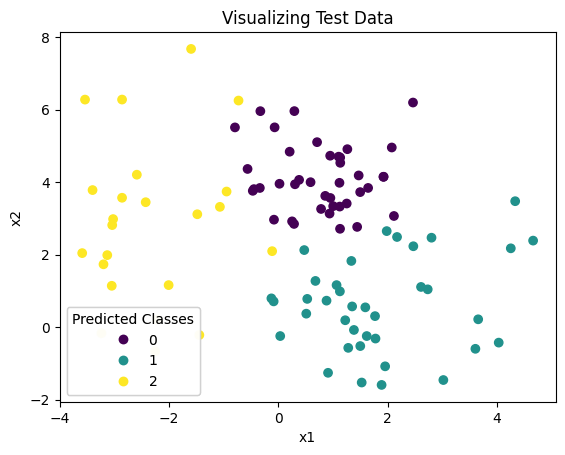

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(X_test[:,0], X_test[:,1], c=y_pred)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Predicted Classes")
ax.add_artist(legend1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Visualizing Test Data')
plt.show()
